In [1]:
import csv
f1=open('data/LOCAL_PEOPLE_DONG_202310.csv', encoding='utf8')
data=csv.reader(f1)

next(data)

data=list(data)
print(len(data))

315456


In [2]:
f2=open('data/dong_code.csv',encoding='utf8')
code_data=csv.reader(f2)

next(code_data)
next(code_data)

code_data=list(code_data)
print(len(code_data))

424


In [3]:
print(data[0])

['20231001', '00', '11380530', '22734.252899999999', '360.9099', '224.83619999999999', '552.17790000000002', '598.92960000000005', '882.56949999999995', '836.17060000000004', '939.64890000000003', '822.58780000000002', '870.59910000000002', '842.64520000000005', '905.89229999999998', '860.71720000000005', '623.16409999999996', '1257.6643999999999', '558.50879999999995', '299.27600000000001', '451.48349999999999', '770.94569999999999', '811.85659999999996', '862.15070000000003', '873.90380000000005', '667.01509999999996', '1019.9621', '960.80579999999998', '1075.1080999999999', '1002.6932', '762.44759999999997', '2039.5830000000001', '']


In [4]:
for row in data:
    for i in range(1,32):
        if i<=2 : 
            row[i] = int(row[i])
        else:
            row[i] = float(row[i])
            
print(data[0])            

['20231001', 0, 11380530, 22734.2529, 360.9099, 224.8362, 552.1779, 598.9296, 882.5695, 836.1706, 939.6489, 822.5878, 870.5991, 842.6452, 905.8923, 860.7172, 623.1641, 1257.6644, 558.5088, 299.276, 451.4835, 770.9457, 811.8566, 862.1507, 873.9038, 667.0151, 1019.9621, 960.8058, 1075.1081, 1002.6932, 762.4476, 2039.583, '']


In [5]:
print(code_data[0])

['1101053', '11110530', '서울', '종로구', '사직동']


In [6]:
for row in code_data:
    row[1] = int(row[1])

print(code_data[0])    

['1101053', 11110530, '서울', '종로구', '사직동']


In [7]:
dong_name = input('행정동명 입력 : ')
for row in code_data:
    if row[-1] == dong_name:
        dong_code=row[1]
        break
print(f"{dong_name} 의 행정동코드는 {dong_code} 입니다")

행정동명 입력 : 한남동
한남동 의 행정동코드는 11170685 입니다


In [8]:
s=0
for row in data:
    if row[2]==dong_code:
        s+=row[3]

print(dong_name, ' 의 10월 총 생활인구수', s)


한남동  의 10월 총 생활인구수 22999421.161699977


In [9]:
s=0
a=int(input("원하는 시간대 입력 :"))

for row in data:
    if (row[2]==dong_code) & (row[1]==a) :
        s+=row[3]

print(dong_name, '의 10월 ',a, '시 평균 생활인구수', s/31)

원하는 시간대 입력 :12
한남동 의 10월  12 시 평균 생활인구수 35765.43214516129


In [10]:
# s=[0,0,0,......,0]


# s=[]
# for i in range(24):
#     s.append(0)


s=[0    for i in range(24)]    
    
for row in data:
    if row[2]==dong_code :
        s[row[1]] += row[3]

for r in range(24):
    s[r] = s[r]/31
    
# s=[j/31  for j in s]
print(s)        

[25054.29143548387, 24742.468529032263, 24473.814493548387, 24212.960822580644, 24066.650467741933, 24633.882132258066, 26094.70113870968, 28840.26171290323, 30890.36898709678, 32565.223719354835, 33816.55066774193, 34775.491200000004, 35765.43214516129, 37303.66415161291, 37964.910074193554, 37764.23281612903, 37712.57536129031, 36511.8678516129, 35529.685296774194, 33774.03221290323, 32034.142790322578, 30386.592787096768, 27799.16243225806, 25203.84844193549]


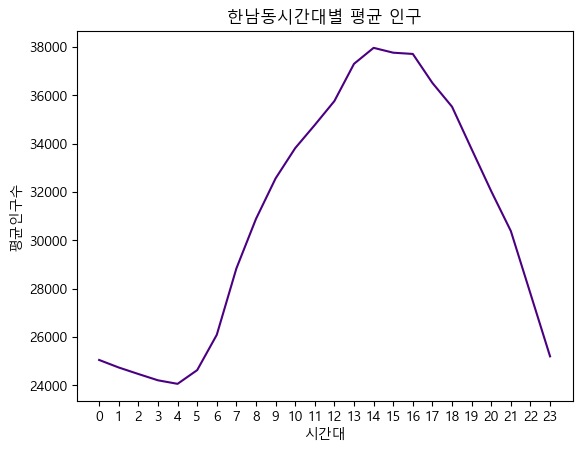

In [11]:
import matplotlib.pyplot as plt

plt.rc('font', family='malgun gothic')
plt.title(dong_name + '시간대별 평균 인구')
plt.plot(range(24), s, color='indigo')
plt.xticks(range(24))
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.show()

#### 두 개 동 비교

첫번째 행정동을 입력하세요 --> 한남동
두번째 행정동을 입력하세요 --> 압구정동


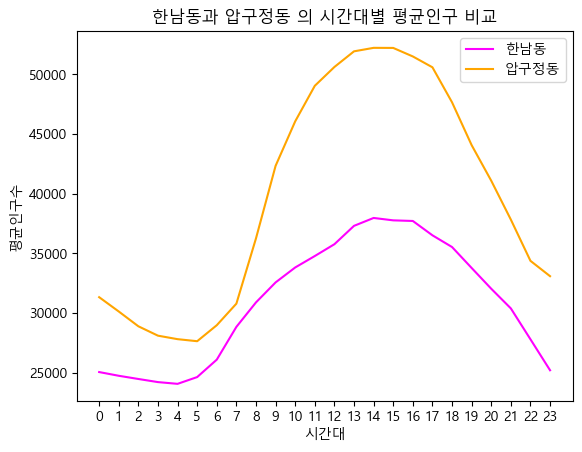

In [12]:
# 행정동-1
dong_name1 = input('첫번째 행정동을 입력하세요 --> ')
for row in code_data: 
    if row[-1] == dong_name1: 
        dong_code1 = int(row[1])

# 행정동-2
dong_name2 = input('두번째 행정동을 입력하세요 --> ')
for row in code_data: 
    if row[-1] == dong_name2: 
        dong_code2 = int(row[1])


s1 = [0 for i in range(24)]
s2 = [0 for i in range(24)]

for row in data: 
    # 행정동-1 인 경우
    if row[2] == dong_code1: 
        s1[row[1]] += row[3]

    # 행정동-2 인 경우
    elif row[2] == dong_code2: 
        s2[row[1]] += row[3]

s1 = [p/31 for p in s1]
s2 = [p/31 for p in s2]

plt.rc('font', family='Malgun Gothic')
plt.title(dong_name1 + '과 '+dong_name2+' 의 시간대별 평균인구 비교')
plt.plot(range(24), s1, color = 'magenta', label=dong_name1)
plt.plot(range(24), s2, color = 'orange', label =dong_name2)
plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.xticks(range(24), range(24))
plt.show()

#### 남녀 시간대별 평균 인구 분석

In [ ]:
### 4~17열 : 남성 데이터
### 18~31열 : 남성 데이터

행정동명 입력 : 한남동


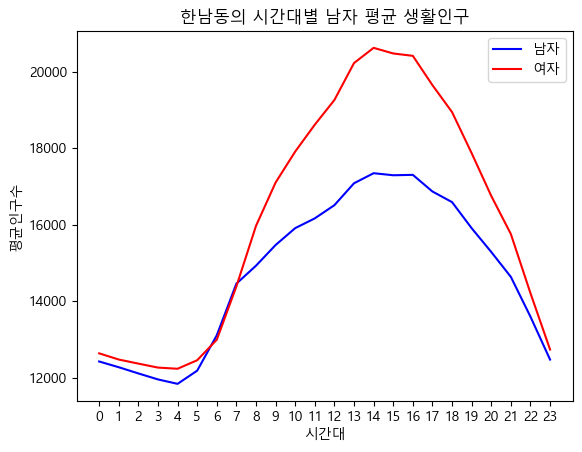

In [18]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')     # 한글처리
plt.rcParams['axes.unicode_minus']=False   # '-'표시 처리


dong_name = input('행정동명 입력 : ')
for row in code_data:
    if row[-1] == dong_name:
        dong_code=row[1]
        break
        
        
male = [0 for i in range(24)]
female = [0 for j in range(24)]

for row in data: 
    if row[2] == dong_code: 
        time = row[1]
        male[time] += sum(row[4:18])      # 남성 인구 총합 구하기  
        female[time] += sum(row[18:32]) 

male = [m/31  for m  in male]
female = [f/31  for f  in female]


plt.title(dong_name + '의 시간대별 남자 평균 생활인구')
plt.plot(range(24), male, color = 'b', label ="남자")
plt.plot(range(24), female, color = 'r', label ="여자")
plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.xticks(range(24))
plt.show() 

### 행정동별 인구수가 많은 지역 10위까지 지도에 표시하기

###### 1. 데이터 불러오기

In [1]:
import csv

# 생활인구 데이터 읽어와서 리스트로 저장하기
f1 = open('data/LOCAL_PEOPLE_DONG_202310.csv', encoding='utf8')    
data = csv.reader(f1)
next(data)
data = list(data)

# 행정동코드 데이터 불러와서 리스트로 저장하기
f2 = open('data/dong_code.csv', encoding='utf8')
code_data = csv.reader(f2)
next(code_data)
next(code_data)
code_data = list(code_data)

# 위치(위도,경도) 데이터 불러와서 리스트로 저장하기
f3 = open('data/dong_location.csv')
location_data = csv.reader(f3)
next(location_data)
location_data = list(location_data)

###### 2. 행정동별  총 생활 인구수를 딕셔너리에 저장

In [3]:
dong_population = {}

for row in data: 
    dong_code, p = row[2], row[3]
    if dong_code not in dong_population.keys(): 
        dong_population[dong_code] = p
    else:
        dong_population[dong_code] += p

        
print(dong_population) 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

